In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

# Create binary target
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)  # 1 for high quality, 0 for low quality

# Split the data into features and target
X = data.drop("quality", axis=1)
y = data["quality"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Train an XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

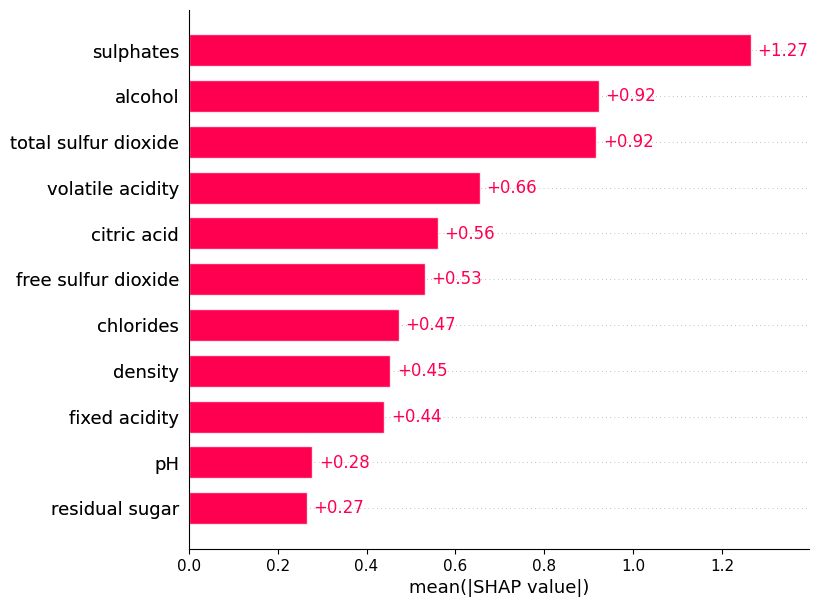

In [3]:
# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# SHAP bar plot for feature importance
shap.plots.bar(shap_values, max_display=12)

# To display the plots in a script
plt.show()

In [32]:
shap_values[0]

.values =
array([ 0.34478384, -1.52105717,  0.20244008, -0.04896748, -0.05086725,
       -0.61219546, -0.73561967, -0.30077058, -0.59479271,  2.00897241,
        2.02077376])

.base_values =
-5.358176121510508

.data =
array([ 8.7   ,  0.69  ,  0.31  ,  3.    ,  0.086 , 23.    , 81.    ,
        1.0002,  3.48  ,  0.74  , 11.6   ])